# 1. Classification and Dimentionality Reduction (PCA) with Vechicle Dataset
## 1.1. Introduction
One of the most important industry applications of modern Machine Learning technique is in various shape recognication problems. In this project, we attempt to classify a number of vehicles into different clusters based on various geometric features extracted from their silhouettes from different angles. 


## 1.2 Context
The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### History

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevation but all angles of rotation.


## 1.3 Domain: Object recognition

## 1.4 Dataset Description
The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The images were acquired by a camera looking downwards at the model vehicle from a fixed angle of elevation (34.2 degrees to the horizontal). The vehicles were placed on a diffuse backlit surface (lightbox). The vehicles were painted matte black to minimise highlights. The images were captured using a CRS4000 framestore connected to a vax 750. All images were captured with a spatial resolution of 128x128 pixels quantised to 64 greylevels. These images were thresholded to produce binary vehicle silhouettes, negated (to comply with the processing requirements of BINATTS) and thereafter subjected to shrink-expand-expand-shrink HIPS modules to remove "salt and pepper" image noise.

The vehicles were rotated and their angle of orientation was measured using a radial graticule beneath the vehicle. 0 and 180 degrees corresponded to "head on" and "rear" views respectively while 90 and 270 corresponded to profiles in opposite directions. Two sets of 60 images, each set covering a full 360 degree rotation, were captured for each vehicle. The vehicle was rotated by a fixed angle between images. These datasets are known as e2 and e3 respectively.

A further two sets of images, e4 and e5, were captured with the camera at elevations of 37.5 degs and 30.8 degs respectively. These sets also contain 60 images per vehicle apart from e4.van which contains only 46 owing to the difficulty of containing the van in the image at some orientations.

The vehicle.csv file contains the consolidated output from all measurements for all vehicles, which we will use as our input data.

 - from [Statlog (Vehicle Silhouettes) Data Set - UCI ML Repository](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29)
 
## 1.5 Attribute Information
 - COMPACTNESS: (average perim)**2/area
 - CIRCULARITY: (average radius)**2/area
 - DISTANCE CIRCULARITY: area/(av.distance from border)**2
 - RADIUS RATIO: (max.rad-min.rad)/av.radius
 - PR.AXIS ASPECT RATIO: (minor axis)/(major axis)
 - MAX.LENGTH ASPECT RATIO: (length perp. max length)/(max length)
 - SCATTER RATIO: (inertia about minor axis)/(inertia about major axis)
 - ELONGATEDNESS: area/(shrink width)**2
 - PR.AXIS RECTANGULARITY: area/(pr.axis length*pr.axis width)
 - MAX.LENGTH RECTANGULARITY: area/(max.length*length perp. to this)
 - SCALED VARIANCE ALONG MAJOR AXIS: (2nd order moment about minor axis)/area
 - SCALED VARIANCE ALONG MINOR AXIS: (2nd order moment about major axis)/area 
 - SCALED RADIUS OF GYRATION: (mavar+mivar)/area
 - SKEWNESS ABOUT MAJOR AXIS: (3rd order moment about major axis)/$\sigma_{min}^3$ 
 - SKEWNESS ABOUT MINOR AXIS: (3rd order moment about minor axis)/$\sigma_{maj}^3$ 
 - KURTOSIS ABOUT MAJOR AXIS: (4th order moment about major axis)/$\sigma_{min}^3$
 - KURTOSIS ABOUT MINOR AXIS: (4th order moment about minor axis)/$\sigma_{maj}^3$
 - HOLLOWS RATIO: (area of hollows)/(area of bounding polygon) Where $\sigma_{maj}^2$ is the variance along the major axis and $\sigma_{min}^2$ is the variance along the minor axis
 - area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

#### NUMBER OF CLASSES: 4
 - OPEL 
 - SAAB 
 - BUS 
 - VAN
 
## 1.6 Objectives
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

●   Exploratory Data Analysis

●   Reduce number dimensions in the dataset with minimal information loss

●   Train a model using Principle Components, and study model performance

# 2. Exploratory Data Analysis
## 2.1 Loading the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Read the data:
data = pd.read_csv('vehicle.csv')
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
# Let's Check the shape of the dataset
data.shape

(846, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- The dataset is of shape (846 rows,19 columns)
- All fields are numeric except 'class', which is our target variable. No need to convert data types.
- There are missing values in circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 columns.

In [5]:
# Let's check which columns have missing values with missing data count per column
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

## 2.2 Data Preparation
Let's handle the missing values in order to be able to visualize the data and prepare it for further processing.
First let's explore the completeness of our dataset with the help of <code>missingno</code>. <code>missingno</code> provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset.

In [7]:
# !pip install missingno

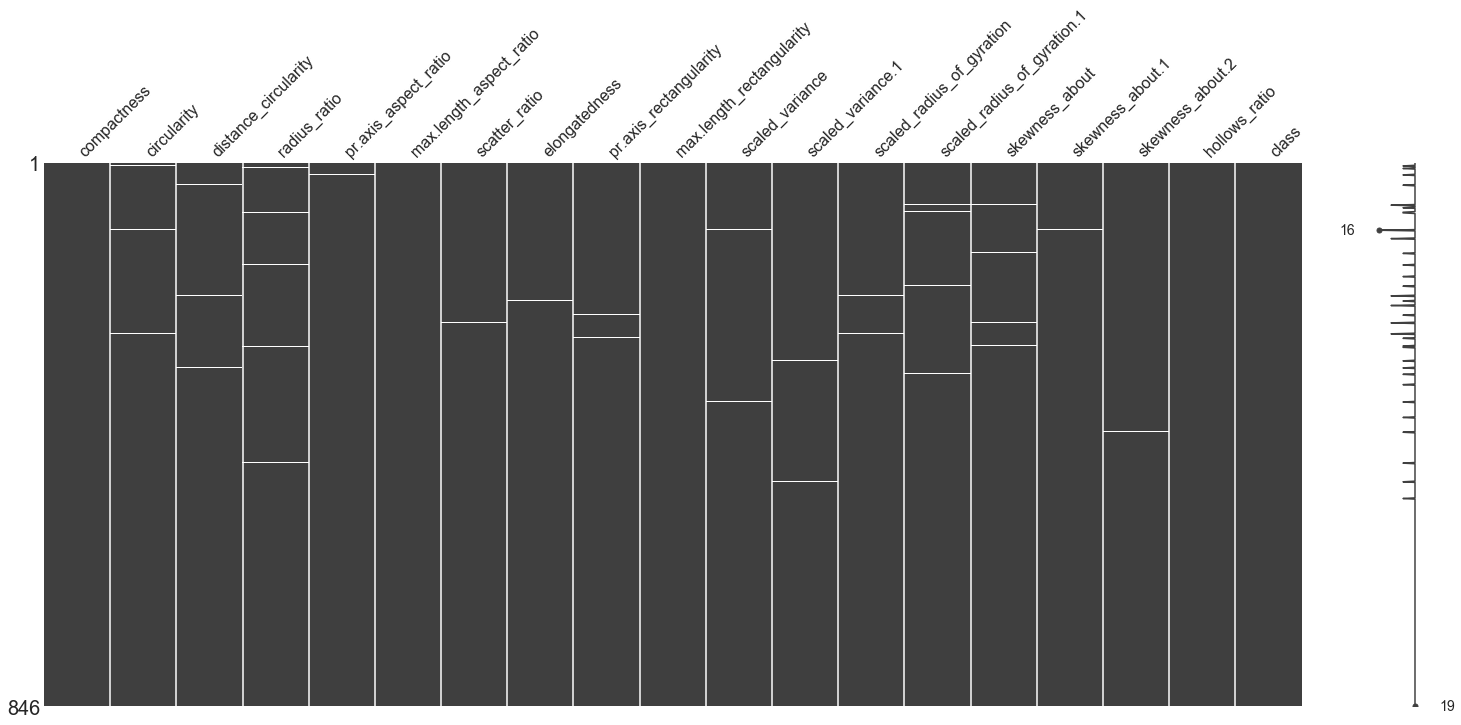

In [8]:
import missingno as msno
msno.matrix(data)

This shows that there are relatively very few datapoints missing, and we can safely drop a few rows which contain multiple missing values.

In [9]:
# dropping rows which has more than 1 null value
null_values_indexs = []
for i in range(len(data.index)) :
    if data.iloc[i].isnull().sum() > 1 :
        print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())
        null_values_indexs.append(i)
        
print(f'\nDroping rows: {null_values_indexs}')

data.drop(null_values_indexs, inplace=True)

Nan in row  66  :  2
Nan in row  105  :  3
Nan in row  118  :  2
Nan in row  207  :  2
Nan in row  222  :  2
Nan in row  249  :  2
Nan in row  266  :  2

Droping rows: [66, 105, 118, 207, 222, 249, 266]


### 2.2.1 Label Encoding the target attribute
There are no missing values in our target column 'class'. We would like to replace the string values with numerical values for further processing.

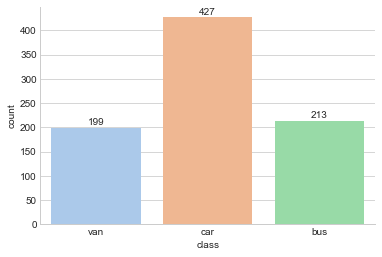

In [10]:
# First let's check the distribution of the target attribute.
ax = sns.countplot(x="class", data=data, palette="pastel")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+6), ha='center')
    
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['class'] = labelencoder.fit_transform(data['class'])
data['class'].value_counts() 

1    427
0    213
2    199
Name: class, dtype: int64

- 0: Bus
- 1: Car
- 2: Van

In [12]:
data.isnull().sum()

compactness                    0
circularity                    2
distance_circularity           2
radius_ratio                   6
pr.axis_aspect_ratio           1
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    3
skewness_about                 3
skewness_about.1               0
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Now we will make a copy of our dataset for data visualization and use the median values to fill in the rest of the missing values. This is because in data preprocessing, we would like to build a transformation pipeline that we can apply to both train and test data separately, so there is no information leakage that results in overfitting.

### 2.2.2 Replacing missing values

In [13]:
data2 = data.copy(deep = True)
# replacing missing values in median of respective column.
for col in data2.columns:
    data2[col].fillna(value= data2[col].median(), inplace = True)

In [14]:
data2.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## 2.3 Data Visualization
Let's explore the dateset vialually to understand the nature, shape and distribution of various attributes, find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why.
### 2.3.1 Univariate Analysis

In [15]:
# Let's Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x = 'class'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    d = data['class'].value_counts()

    splot = ax[1].bar(x = d.index, height = d.values)

    for p in splot.patches:
        ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Count')
    ax[1].set_title(f'Class Distribution Bar Graph')


    fig.tight_layout()
    plt.show()

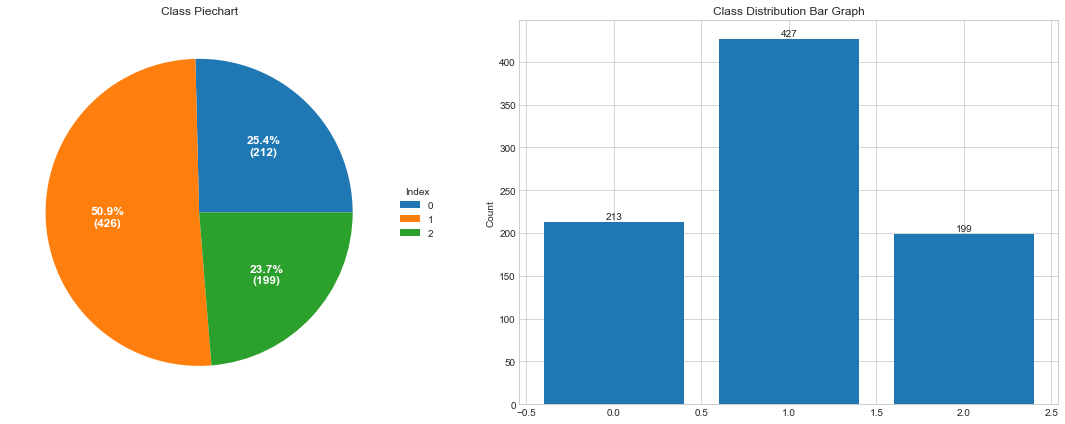

In [16]:
cat_view('class')

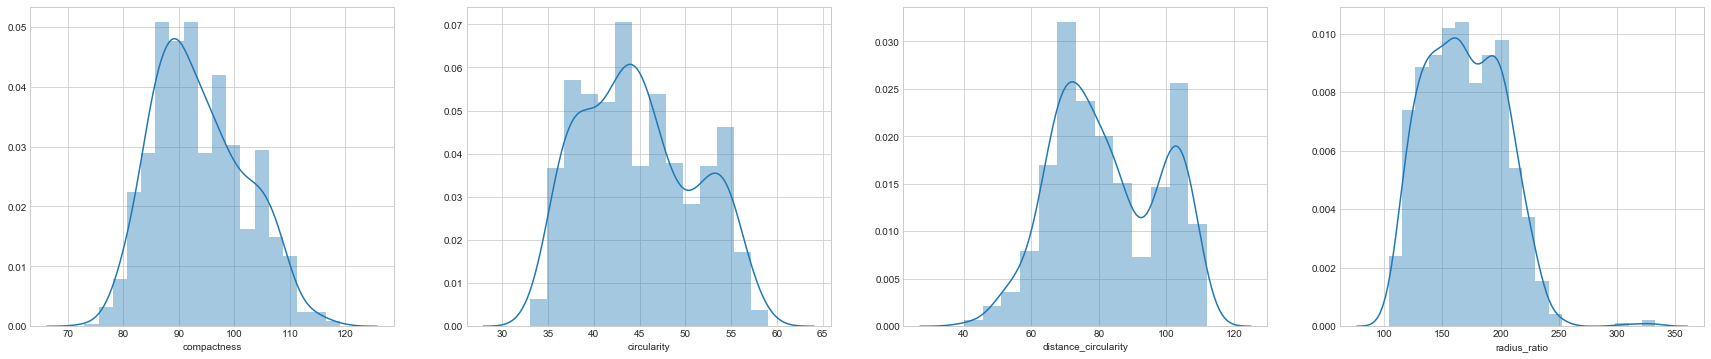

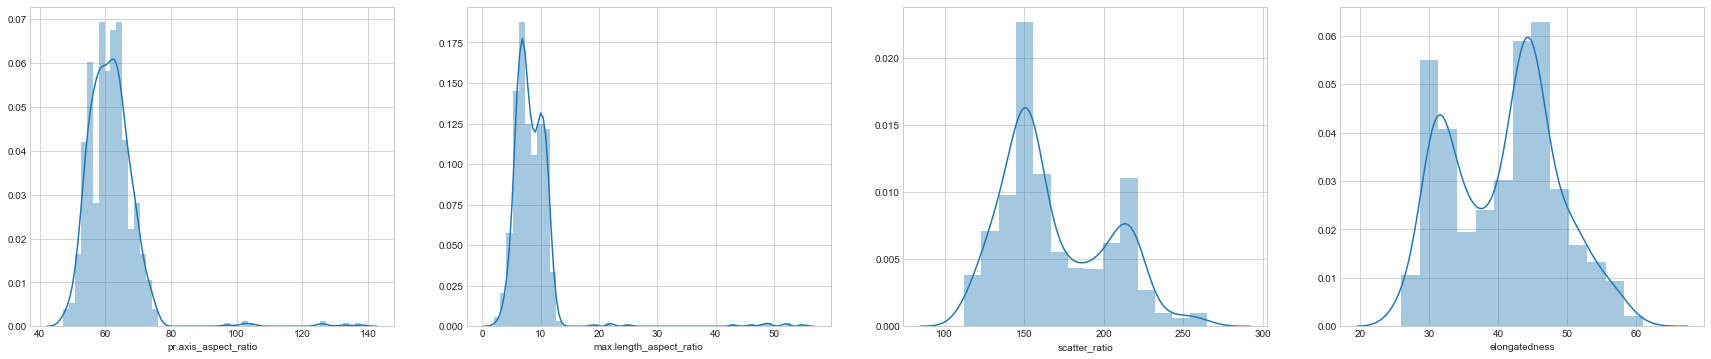

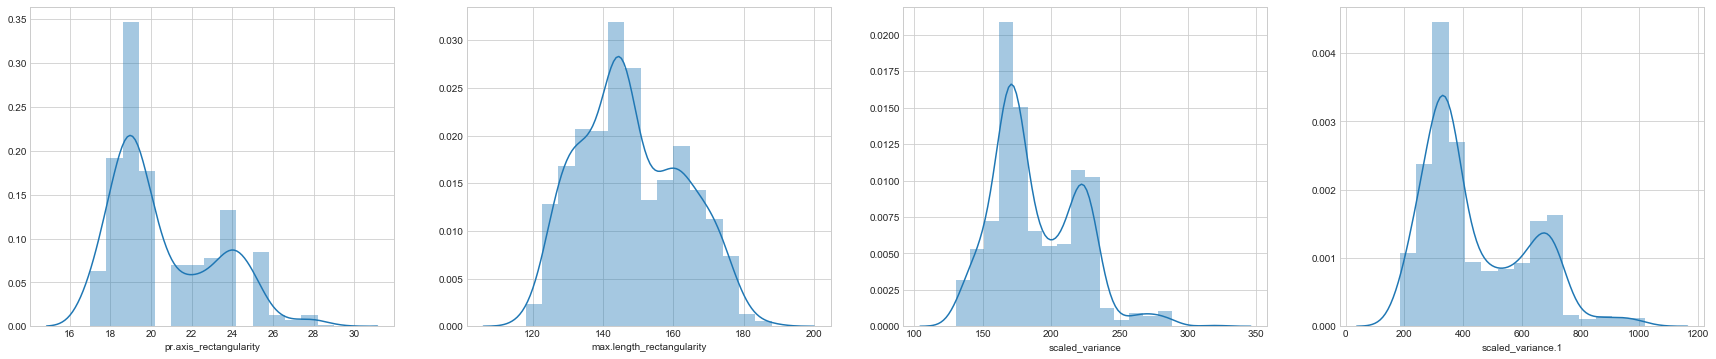

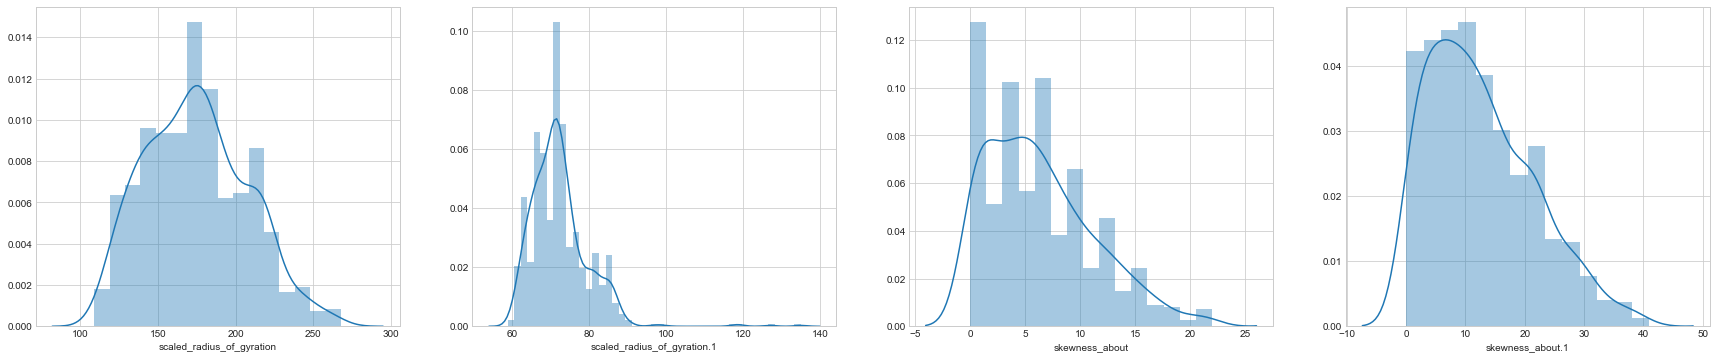

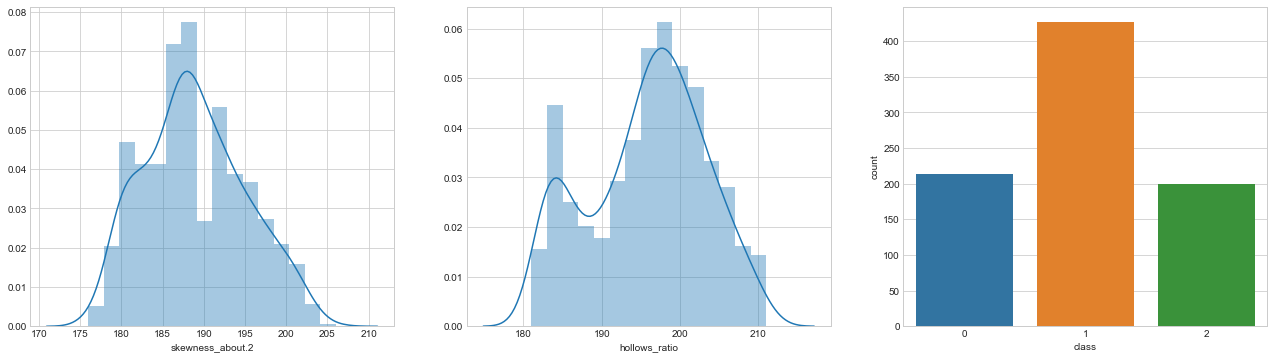

In [17]:
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if pos == 1:
        plt.figure(figsize= (30,20))  # Set the figure size
        
    plt.subplot(3, 4, pos)   # plot grid
    if feature != 'class':   # Plot histogram for all the continuous columns
        sns.distplot(data2[feature], kde= True )
    else:
        sns.countplot(data2[feature])    # Plot bar chart for all the categorical columns
    
    pos += 1  # to plot over the grid one by one  
    if pos > 4:
        pos = 1

In [18]:
peak_ponts = {
    'circularity': 'Total 2 peaks.',
    'distance_circularity': 'Total 2 peaks.',
    'radius_ratio': 'Total 2 peaks.',
    'max.length_aspect_ratio':  'Total 2 peaks.',
    'scatter_ratio':  'Total 2 peaks.',
    'pr.axis_rectangularity':  'Total 2 peaks.',
    'scaled_variance':  'Total 2 peaks.',
    'scaled_variance.1':  'Total 2 peaks.',
    'hollows_ratio':  'Total 2 peaks.',
}

In [19]:
from scipy.stats import skew
# skewness = 0 : normally distributed.
# skewness > 0 : more weight in the right tail of the distribution.
# skewness < 0 : more weight in the left tail of the distribution.

for col in data2.columns:
    skewness = skew(data2[col])
    label = ''
    if skewness == 0:
        label = 'Normally distributed.'
    elif skewness > 0:
        label = 'More weight in the right tail of the distribution.' # right skewed
    elif skewness < 0:
        label = 'More weight in the left tail of the distribution.' # left skewed
        
    if col in peak_ponts:
        peak_label = peak_ponts[col]
    else:
        peak_label = ''
    print(f'- Skewness of {col} is {skewness}. {label} { peak_label } \n')

- Skewness of compactness is 0.37748689633545085. More weight in the right tail of the distribution.  

- Skewness of circularity is 0.26386502615046775. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of distance_circularity is 0.10645901446099797. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of radius_ratio is 0.39900595429590474. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of pr.axis_aspect_ratio is 3.8245003565724494. More weight in the right tail of the distribution.  

- Skewness of max.length_aspect_ratio is 6.746159664978879. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of scatter_ratio is 0.6038793669729973. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of elongatedness is 0.046381595773453826. More weight in the right tail of the distribution.  

- Skewness of pr.axis_rectangularity is 0.7714611267169009. More w

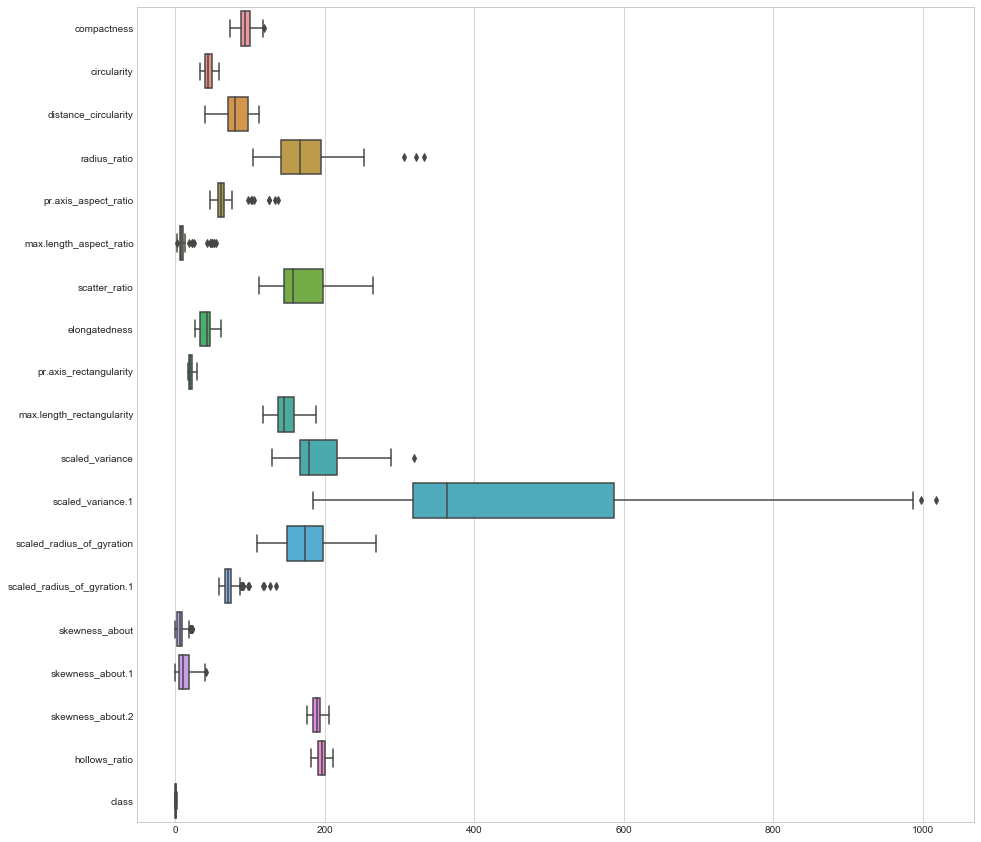

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data2, orient='h')

From the distribution and boxplots, we can see that the arrtibutes: 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'skewness_about' and 'scaled_radius_of_gyration' are heavily left-skwewd, with a lot of outlier values. But how important are these features with respect to the target, and can we safely ignore these features? We will explore this by studying feature importance at a later step.

### 2.3.2 Multivariate Analysis

In [21]:
from IPython.display import Image
# First, let us analyze pairwise correlation between different predictor attributes.
# sns_plot = sns.pairplot(data2, hue = 'class')
# sns_plot.savefig("pairplot.png")
# plt.clf()

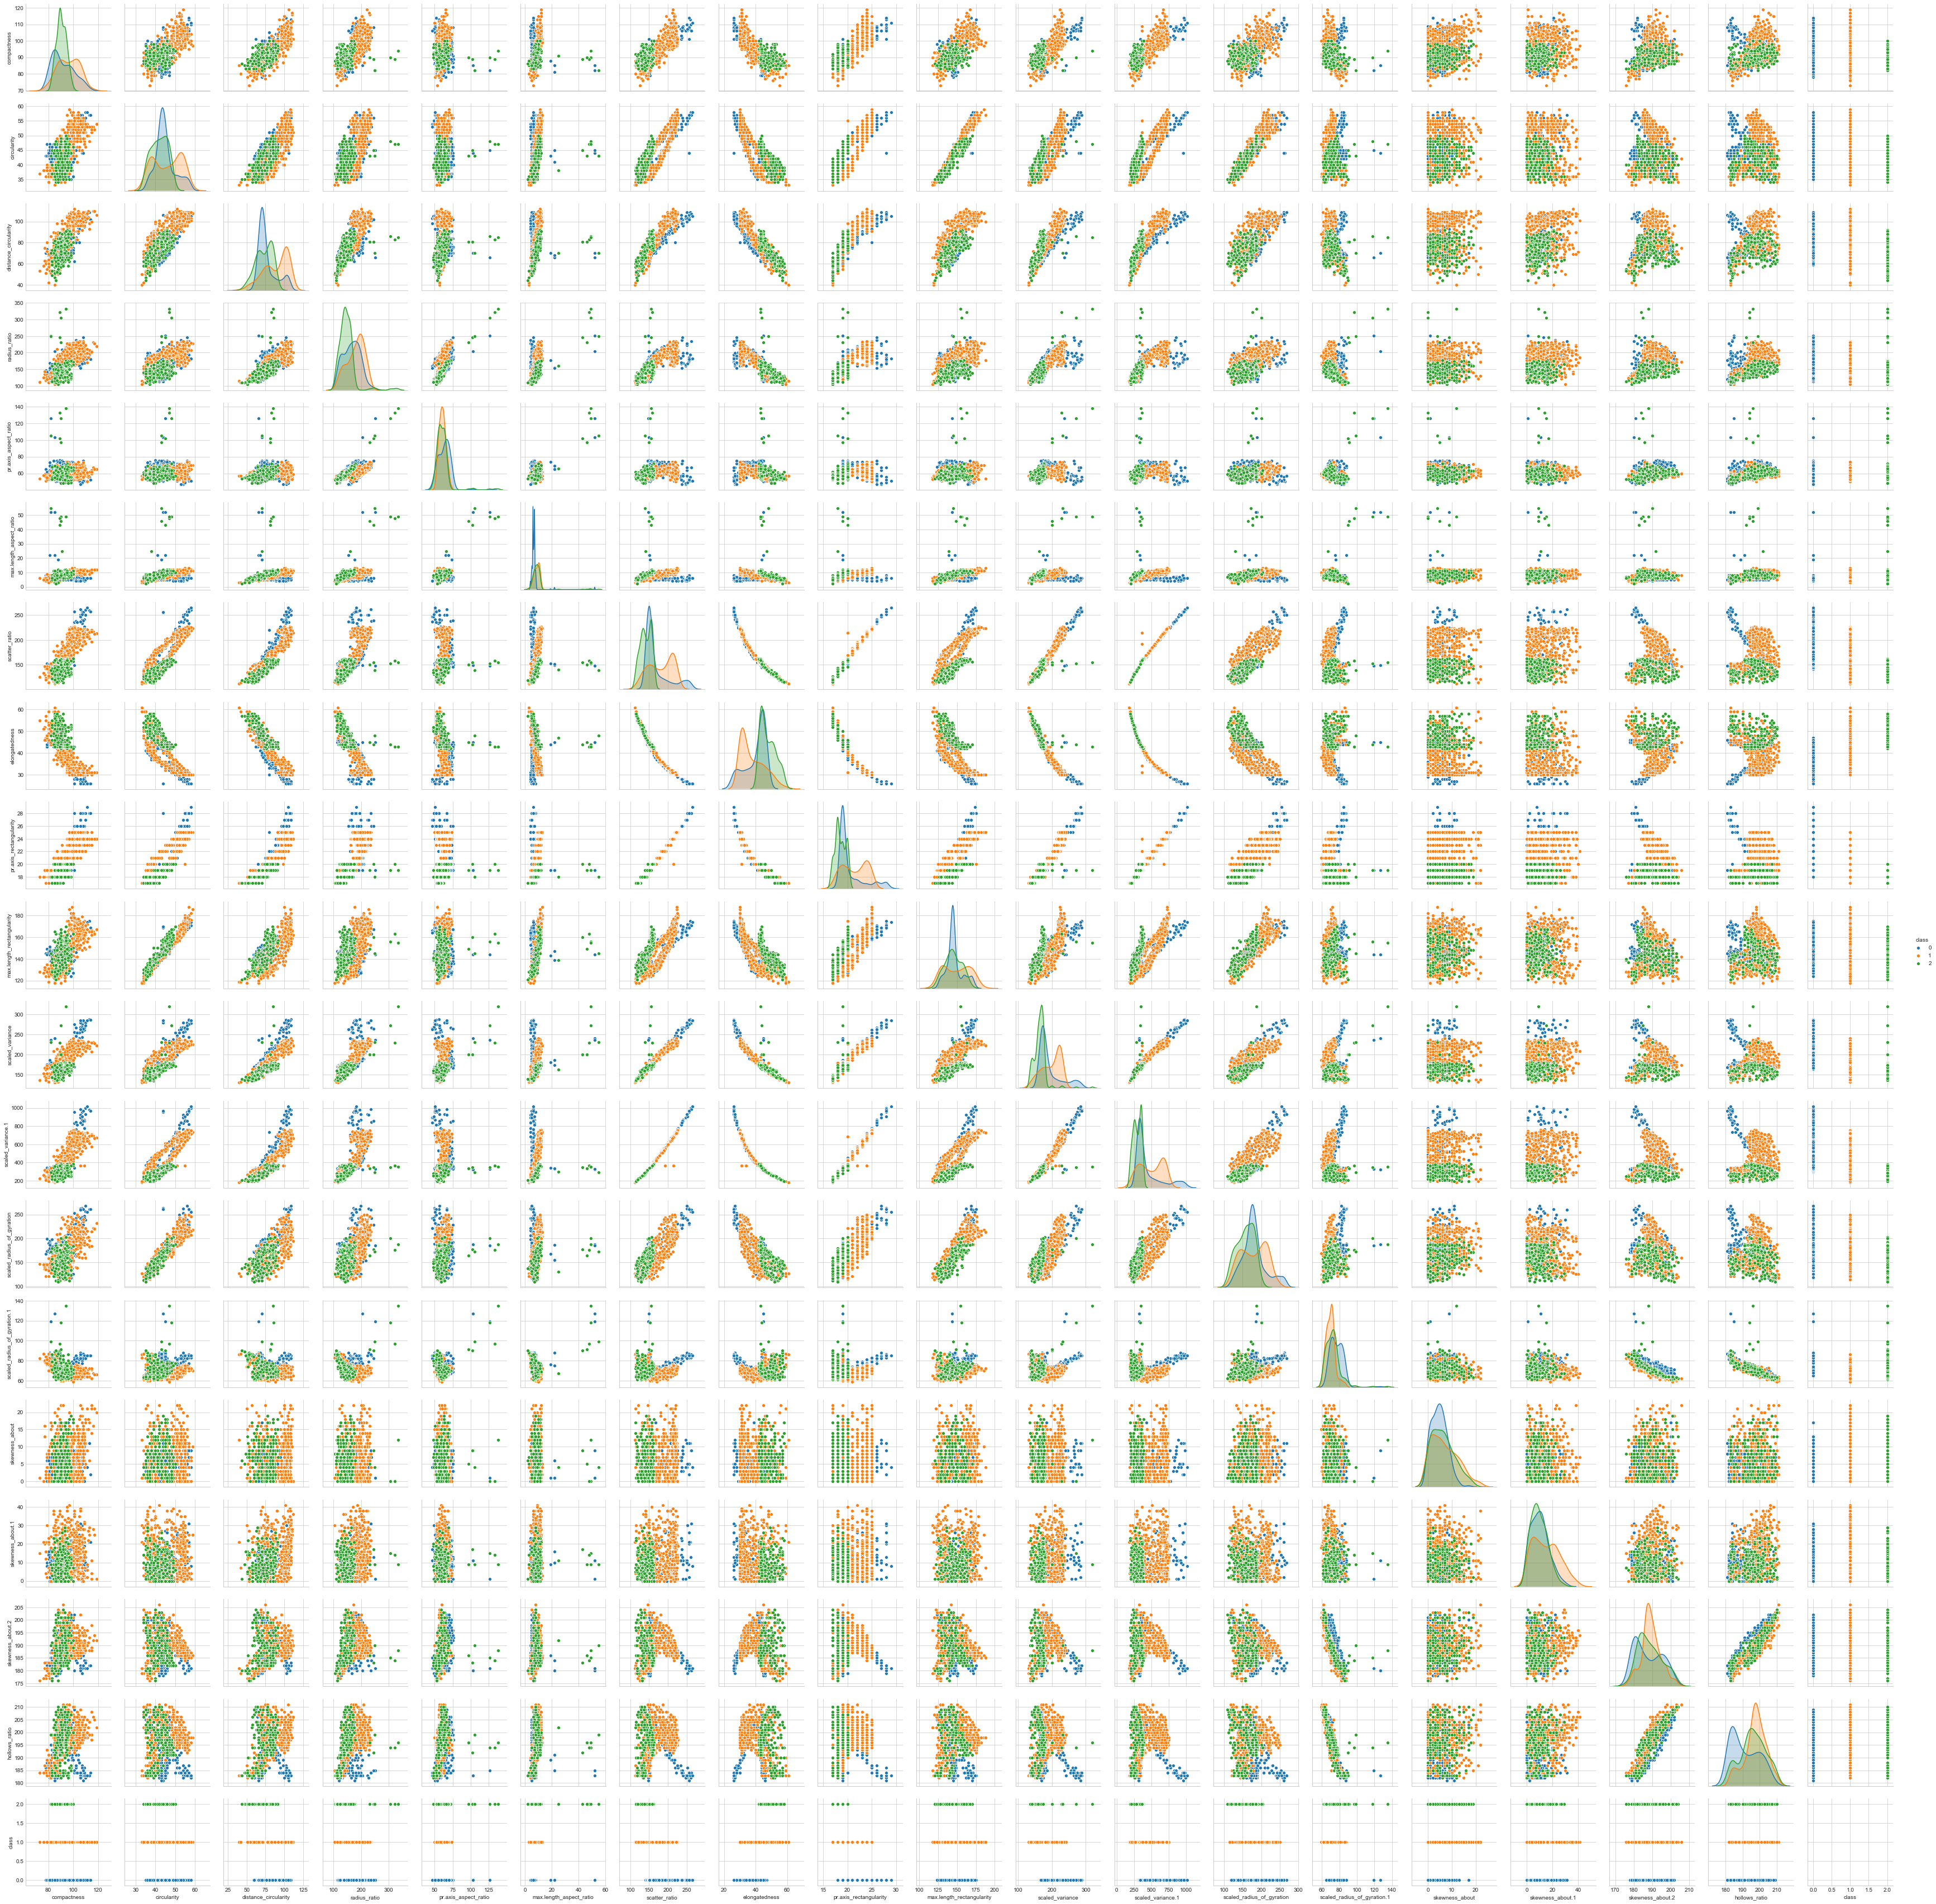

In [22]:
Image(filename='pairplot.png')

(19.0, 0.0)

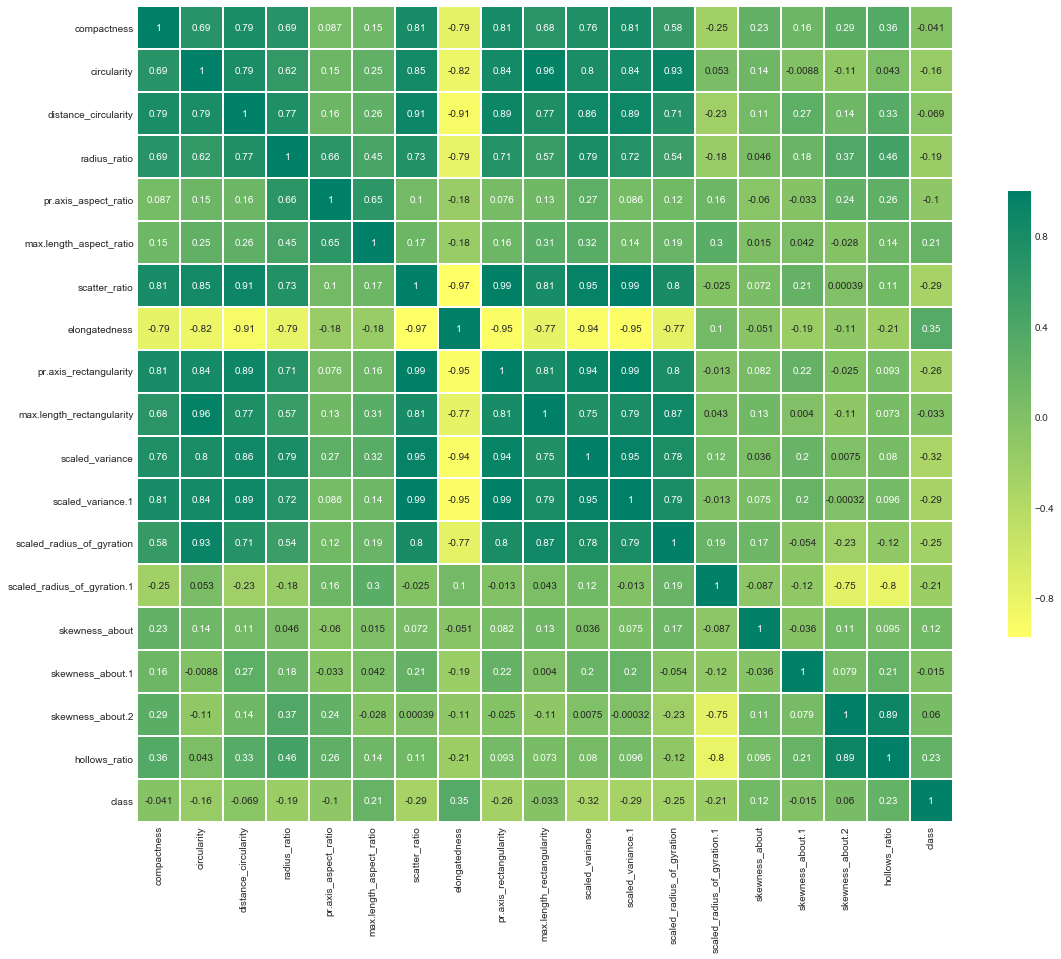

In [23]:
# Let's study the Correlation Matrix
plt.figure(figsize = (20,15))
sns.set_style(style = 'white')
g = sns.heatmap(data2.corr(), annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

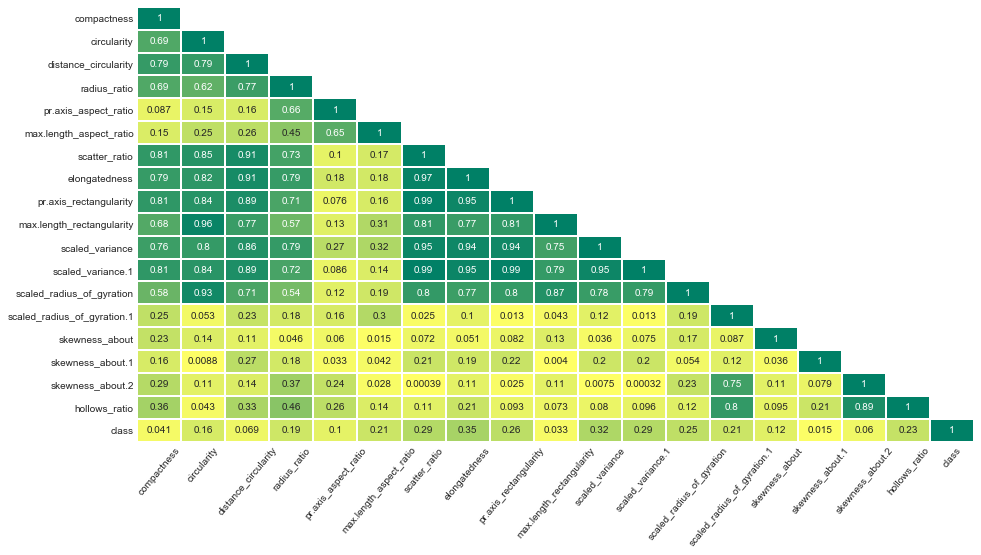

In [24]:
# Create correlation matrix
corr_matrix = data2.corr().abs()

# Select upper triangle of correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(np.bool))

mask = lower == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
g = sns.heatmap(lower, center=0.5, cmap= 'summer_r', annot= True, xticklabels = corr_matrix.index, 
                yticklabels = corr_matrix.columns, cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.show()

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in lower.columns if any(lower[column] > 0.95)]

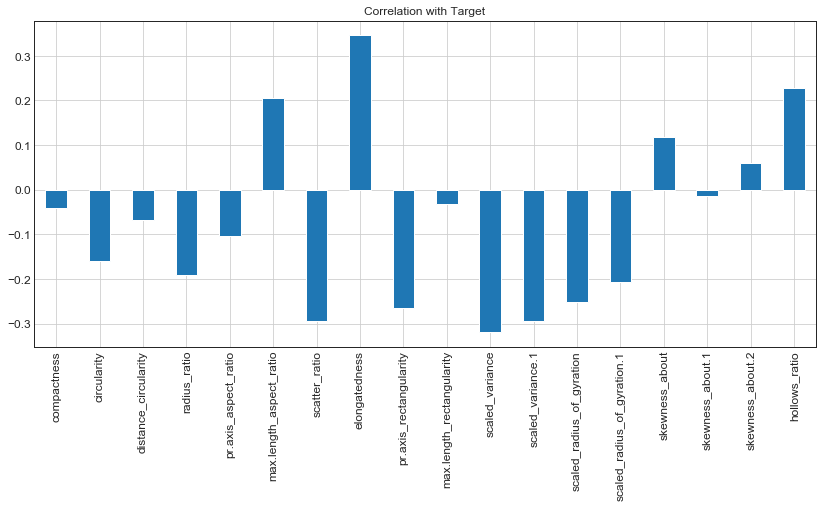

In [25]:
# Correlation with Target
predictors = data2.drop('class', axis=1)
predictors.corrwith(data2['class']).plot.bar(figsize = (14, 6), title = "Correlation with Target", fontsize = 12, grid = True)

### 2.3.3 Feature Importance
In order to understand the importance of various features, let's quickly train a Random Forest classifier to make use of the inbuilt 'Feature Importance'.

In [26]:
X = data2.drop('class', axis  = 1)
y = data2['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)
X_train.shape

(587, 18)

Text(0.5, 0, 'Relative Importance')

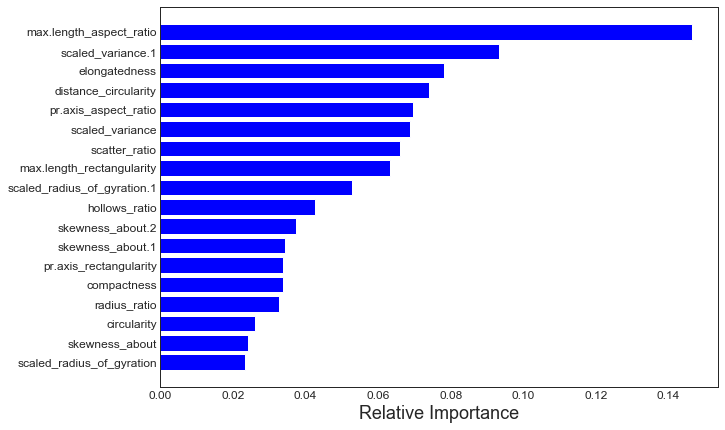

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

### 2.3.4 Observations
- Many predictor attributes are skwewd and have long tails indicating outliers
- Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship
- Many features show very high correlation which indicates that we need to drop multiple features. We will use PCA for the same.

## 3. Data Pre-processing
Now let's go back to the original data in order to prepare the data for our ML Algorithms. First order of business is to split the data into a train and test set.
### 3.1 Train - Test Split

In [28]:
X = data.drop('class', axis  = 1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [29]:
print(f'Shape of train data set: {X_train.shape}')
print(f'Shape of test data set: {X_test.shape}')

Shape of train data set: (587, 18)
Shape of test data set: (252, 18)


### 3.2 Pre - Processing Pipeline

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
X_train_std = transformer.fit_transform(X_train)
y_train = y_train.to_numpy()

In [31]:
X_test_std = transformer.fit_transform(X_test)
y_test = y_test.to_numpy()

## 4. Training a Classifier
### 4.1 SVM Classifier
Let's train an SVM Classifier to classify the objects. First, we will train our model by calling standard SVC() function without doing Hyper-parameter Tuning and see its classification and confusion matrix.

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# train the model on train set 
model = SVC() 
model.fit(X_train_std, y_train) 
  
# print prediction results 
y_pred = model.predict(X_test_std) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       128
           2       0.93      0.95      0.94        60

    accuracy                           0.96       252
   macro avg       0.96      0.96      0.96       252
weighted avg       0.96      0.96      0.96       252



In [33]:
svc_score = model.score(X_test_std, y_test)

print(f'SVM accuracy: {svc_score}')

SVM accuracy: 0.9642857142857143


In [34]:
from sklearn import metrics

print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred,y_test))

Confusion Matrix:
 [[ 62   2   1]
 [  0 124   2]
 [  2   2  57]]


### 4.2 SVM Hyperparameter - Tuning

In [35]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train_std, y_train) 

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    5.0s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [36]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [37]:
svm_clf = grid.best_estimator_

### 4.3 k-Fold Cross Validation with best estimator

In [38]:
from sklearn import model_selection
svc_cross_val_score = model_selection.cross_val_score(svm_clf, X_train_std, y_train, cv=3, scoring='accuracy')

print(f'Cross validation score: {svc_cross_val_score}')

Cross validation score: [0.97969543 0.98979592 0.96391753]


In [39]:
# Accuracy on the test set
svc_score = svm_clf.score(X_test_std, y_test)

print(f'SVM Test accuracy: {svc_score}')

SVM Test accuracy: 0.9801587301587301


## 5. Principal Component Analysis

### 5.1 Visualization of Clusters using Dimentionality Reduction techniques

In [40]:
from sklearn.decomposition import PCA
pca = PCA()

pca_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA())])

X_pca = pca_transformer.fit_transform(X)

In [41]:
print(pca_transformer.named_steps["pca"].explained_variance_ratio_)

[5.21728287e-01 1.67312048e-01 1.06006605e-01 6.55792330e-02
 5.08159395e-02 3.00483129e-02 1.99669065e-02 1.23630876e-02
 8.90054223e-03 5.12189609e-03 3.57983696e-03 2.52024491e-03
 1.98332910e-03 1.44178030e-03 1.13710816e-03 8.59979848e-04
 5.44126132e-04 9.07371334e-05]


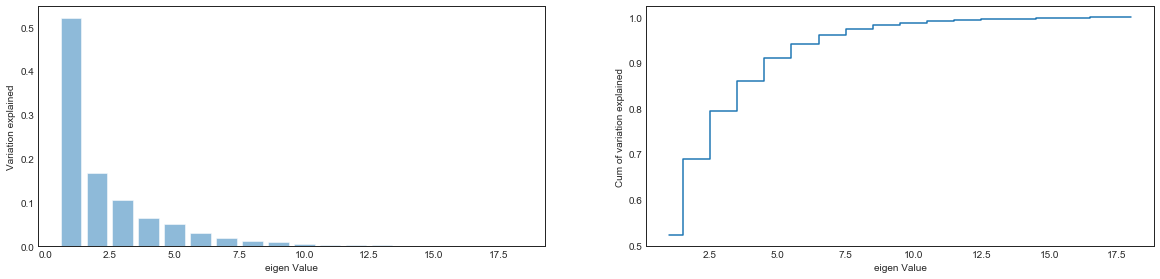

In [42]:
explained_variance_ratio = pca_transformer.named_steps["pca"].explained_variance_ratio_

plt.figure(figsize= (20,15))

plt.subplot(3, 2, 1)
plt.bar(list(range(1,19)), explained_variance_ratio, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

plt.subplot(3, 2, 2)
plt.step(list(range(1,19)), np.cumsum(explained_variance_ratio), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Now 11 dimensions seems very reasonable. With 11 variables we can explain over 99% of the variation in the original data.

In [43]:
pca = PCA(2)  # project from 22 to 2 dimensions
X_pca = pca.fit_transform(X_train_std)
print(X_train_std.shape)
print(X_pca.shape)

(587, 18)
(587, 2)


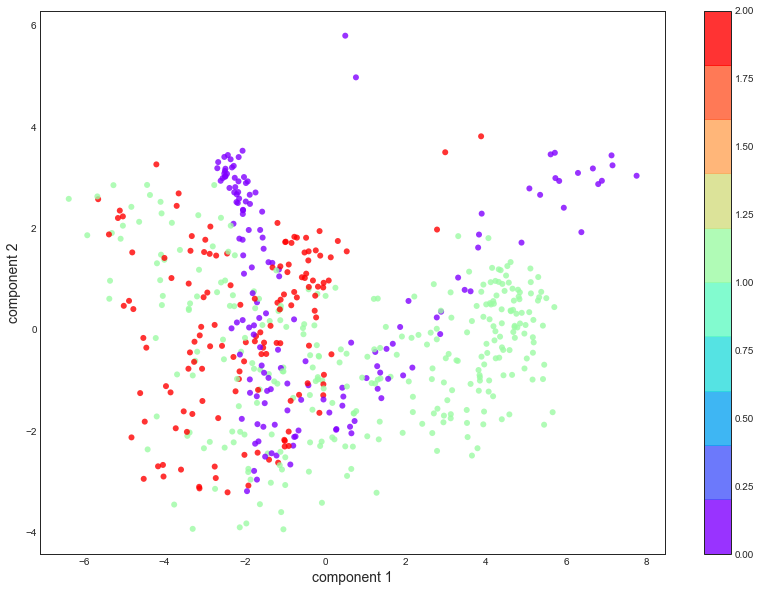

In [44]:
plt.figure(figsize=(14,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1', fontsize = 14)
plt.ylabel('component 2', fontsize = 14)
plt.colorbar();

 - We can see the spread of the data and 3 clusters (0 = Purple, 1 = Blue, 3 = Red) for 2 Principal components, but the clusters are not too clear.
 - Let's use t-SNE to visualize the data in 2 dimensions.

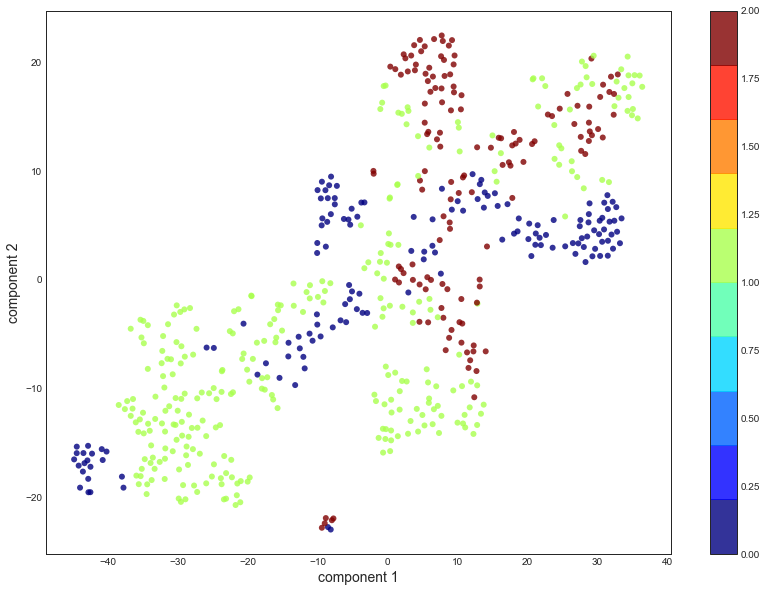

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_std)

plt.figure(figsize=(14,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=y_train, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1', fontsize = 14)
plt.ylabel('component 2', fontsize = 14)
plt.colorbar()
plt.show()

In [46]:
pca_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=11))])

X_pca = pca_transformer.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify = y)

In [47]:
print(f'Shape of new training data: {X_train_pca.shape}')
print(f'Shape of new test data: {X_test_pca.shape}')

Shape of new training data: (587, 11)
Shape of new test data: (252, 11)


### 5.2 Training an SVM Classifier on the PCA - transformed dataset
Let's train a Support vector machine using the train set and get the accuracy on the test set.

In [48]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train_pca, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.9s finished
D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [49]:
svm_clf2 = grid.best_estimator_

In [50]:
pca_svc_cross_val_score = model_selection.cross_val_score(svm_clf2, X_train_pca, y_train, cv=3, scoring='accuracy')

print(f'Cross validation score: {pca_svc_cross_val_score}')

Cross validation score: [0.96954315 0.97959184 0.94845361]


In [51]:
# Accuracy on the test set
pca_svc_score = svm_clf2.score(X_test_pca, y_test)

print(f'SVM Test accuracy: {pca_svc_score}')

SVM Test accuracy: 0.9642857142857143


In [52]:
print(f'\nSVM score: {svc_score}')
print(f'Cross validation score: {svc_cross_val_score}\n')

# print('SVM Score after PCA:')
print(f'SVM Score after PCA: {pca_svc_score}')
print(f'Cross validation score after PCA: {pca_svc_cross_val_score}')


SVM score: 0.9801587301587301
Cross validation score: [0.97969543 0.98979592 0.96391753]

SVM Score after PCA: 0.9642857142857143
Cross validation score after PCA: [0.96954315 0.97959184 0.94845361]


### Conclusion:
Looks like by drop reducing dimensionality by 7, we only dropped around 1% in accuracy! Because the PCA transformed dataset is isgnificanty more efficient in terms of time and computational resources, the loss in information and slight drop in model performance is an acceptable trade-off here.